### Market Sentiment History Analysis

This notebook visualizes the historical trend of market-wide sentiment indicators by plotting the daily summary statistics file.

**Workflow:**
1.  **Prerequisite:** The historical statistics file (`market_daily_summary_stats_history.csv`) must exist and contain data.
2.  **Load Data:** Loads the historical data.
3.  **Generate Plots:** Creates a dashboard of time-series p

### Setup and Configuration

This cell defines all necessary imports, file paths, and visualization parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pathlib import Path

# --- File Path Configuration ---
# Use pathlib for robust, cross-platform path management.
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR
DATA_DIR = ROOT_DIR / 'data'
HISTORY_FILE_PATH = DATA_DIR / 'market_daily_summary_stats_history.csv'

# --- Font Size Configuration ---
FONT_SCALE = 1.8
TITLE_FONTSIZE = 16 * FONT_SCALE
SUBPLOT_TITLE_FONTSIZE = 12 * FONT_SCALE
AXIS_LABEL_FONTSIZE = 10 * FONT_SCALE
TICK_LABEL_FONTSIZE = 9 * FONT_SCALE
LEGEND_FONTSIZE = 9 * FONT_SCALE

# --- Verification ---
print(f"Reading history from: {HISTORY_FILE_PATH}")

Reading history from: C:\Users\ping\Files_win10\python\py311\stocks_copy\data\market_daily_summary_stats_history.csv


### Step 1: Load and Prepare Data

Load the historical market statistics from the CSV file.

In [2]:
print(f"--- Step 1: Loading historical data ---")

try:
    df_history = pd.read_csv(HISTORY_FILE_PATH, index_col='Date', parse_dates=True)
    df_history.sort_index(inplace=True)
    
    if df_history.empty:
        print("Warning: The history file is empty. No plots can be generated.")
    else:
        print(f"Successfully loaded data for {len(df_history)} dates.")
        
except FileNotFoundError:
    print(f"ERROR: History file not found at '{HISTORY_FILE_PATH}'. Halting execution.")
    df_history = None
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    df_history = None

--- Step 1: Loading historical data ---
Successfully loaded data for 44 dates.


### Step 2: Define Plotting Functions

To keep the main plotting logic clean, each subplot is generated by its own dedicated function.

In [3]:
def plot_rsi_sentiment(ax, df):
    ax.plot(df.index, df['RSI_mean'], label='Mean RSI', marker='o', markersize=3)
    ax.fill_between(df.index, df['RSI_25%'], df['RSI_75%'], color='blue', alpha=0.2, label='RSI 25%-75% Range')
    ax.axhline(50, color='grey', linestyle='--', linewidth=0.8, label='Neutral (50)')
    ax.axhline(70, color='red', linestyle=':', linewidth=0.8, label='Overbought (70)')
    ax.axhline(30, color='green', linestyle=':', linewidth=0.8, label='Oversold (30)')
    ax.set_title('Market Sentiment (RSI)')
    ax.set_ylabel('RSI Value')
    ax.legend()

def plot_short_term_perf(ax, df):
    ax.plot(df.index, df['Perf 3D %_mean'], label='Mean 3-Day Perf %', marker='o', markersize=3)
    ax.plot(df.index, df['Perf Week %_mean'], label='Mean Week Perf %', marker='s', markersize=3)
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    ax.set_title('Average Short-Term Performance')
    ax.set_ylabel('Performance (%)')
    ax.legend()

def plot_dist_from_sma(ax, df):
    ax.plot(df.index, df['SMA20 %_mean'], label='Mean % vs SMA20', marker='o', markersize=3)
    ax.plot(df.index, df['SMA50 %_mean'], label='Mean % vs SMA50', marker='s', markersize=3)
    ax.plot(df.index, df['SMA200 %_mean'], label='Mean % vs SMA200', marker='^', markersize=3)
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    ax.set_title('Average Distance from Moving Averages')
    ax.set_ylabel('Percent (%)')
    ax.legend()

def plot_dist_from_high_low(ax, df):
    ax.plot(df.index, df['50D High %_mean'], label='Mean % from 50D High', marker='o', markersize=3)
    ax.plot(df.index, df['50D Low %_mean'], label='Mean % above 50D Low', marker='s', markersize=3)
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    ax.set_title('Average Distance from 50-Day High/Low')
    ax.set_ylabel('Percent (%)')
    ax.legend()

def plot_volume_and_volatility(ax, df):
    color = 'tab:red'
    ax.set_ylabel('Relative Volume (Ratio)', color=color)
    ax.plot(df.index, df['Rel Volume_mean'], label='Mean Relative Volume', marker='o', markersize=3, color=color)
    ax.tick_params(axis='y', labelcolor=color)
    ax.axhline(1, color='grey', linestyle='--', linewidth=0.8, label='Avg Volume (1.0)')
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Weekly Volatility (%)', color=color)
    ax2.plot(df.index, df['Volatility W %_mean'], label='Mean Weekly Volatility %', marker='s', markersize=3, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')
    ax.set_title('Relative Volume & Volatility')

def plot_risk_adjusted_returns(ax, df):
    ax.plot(df.index, df['Sharpe 3d_mean'], label='Mean Sharpe (3d)', marker='o', markersize=3, color='teal')
    ax.plot(df.index, df['Sortino 3d_mean'], label='Mean Sortino (3d)', marker='s', markersize=3, color='navy')
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    ax.set_title('Average Risk-Adjusted Returns (3-Day)')
    ax.set_ylabel('Ratio Value')
    ax.legend()

### Step 3: Generate and Display Dashboard

This step creates the figure and axes, then calls the plotting functions to populate the dashboard.


--- Step 3: Generating historical sentiment dashboard ---


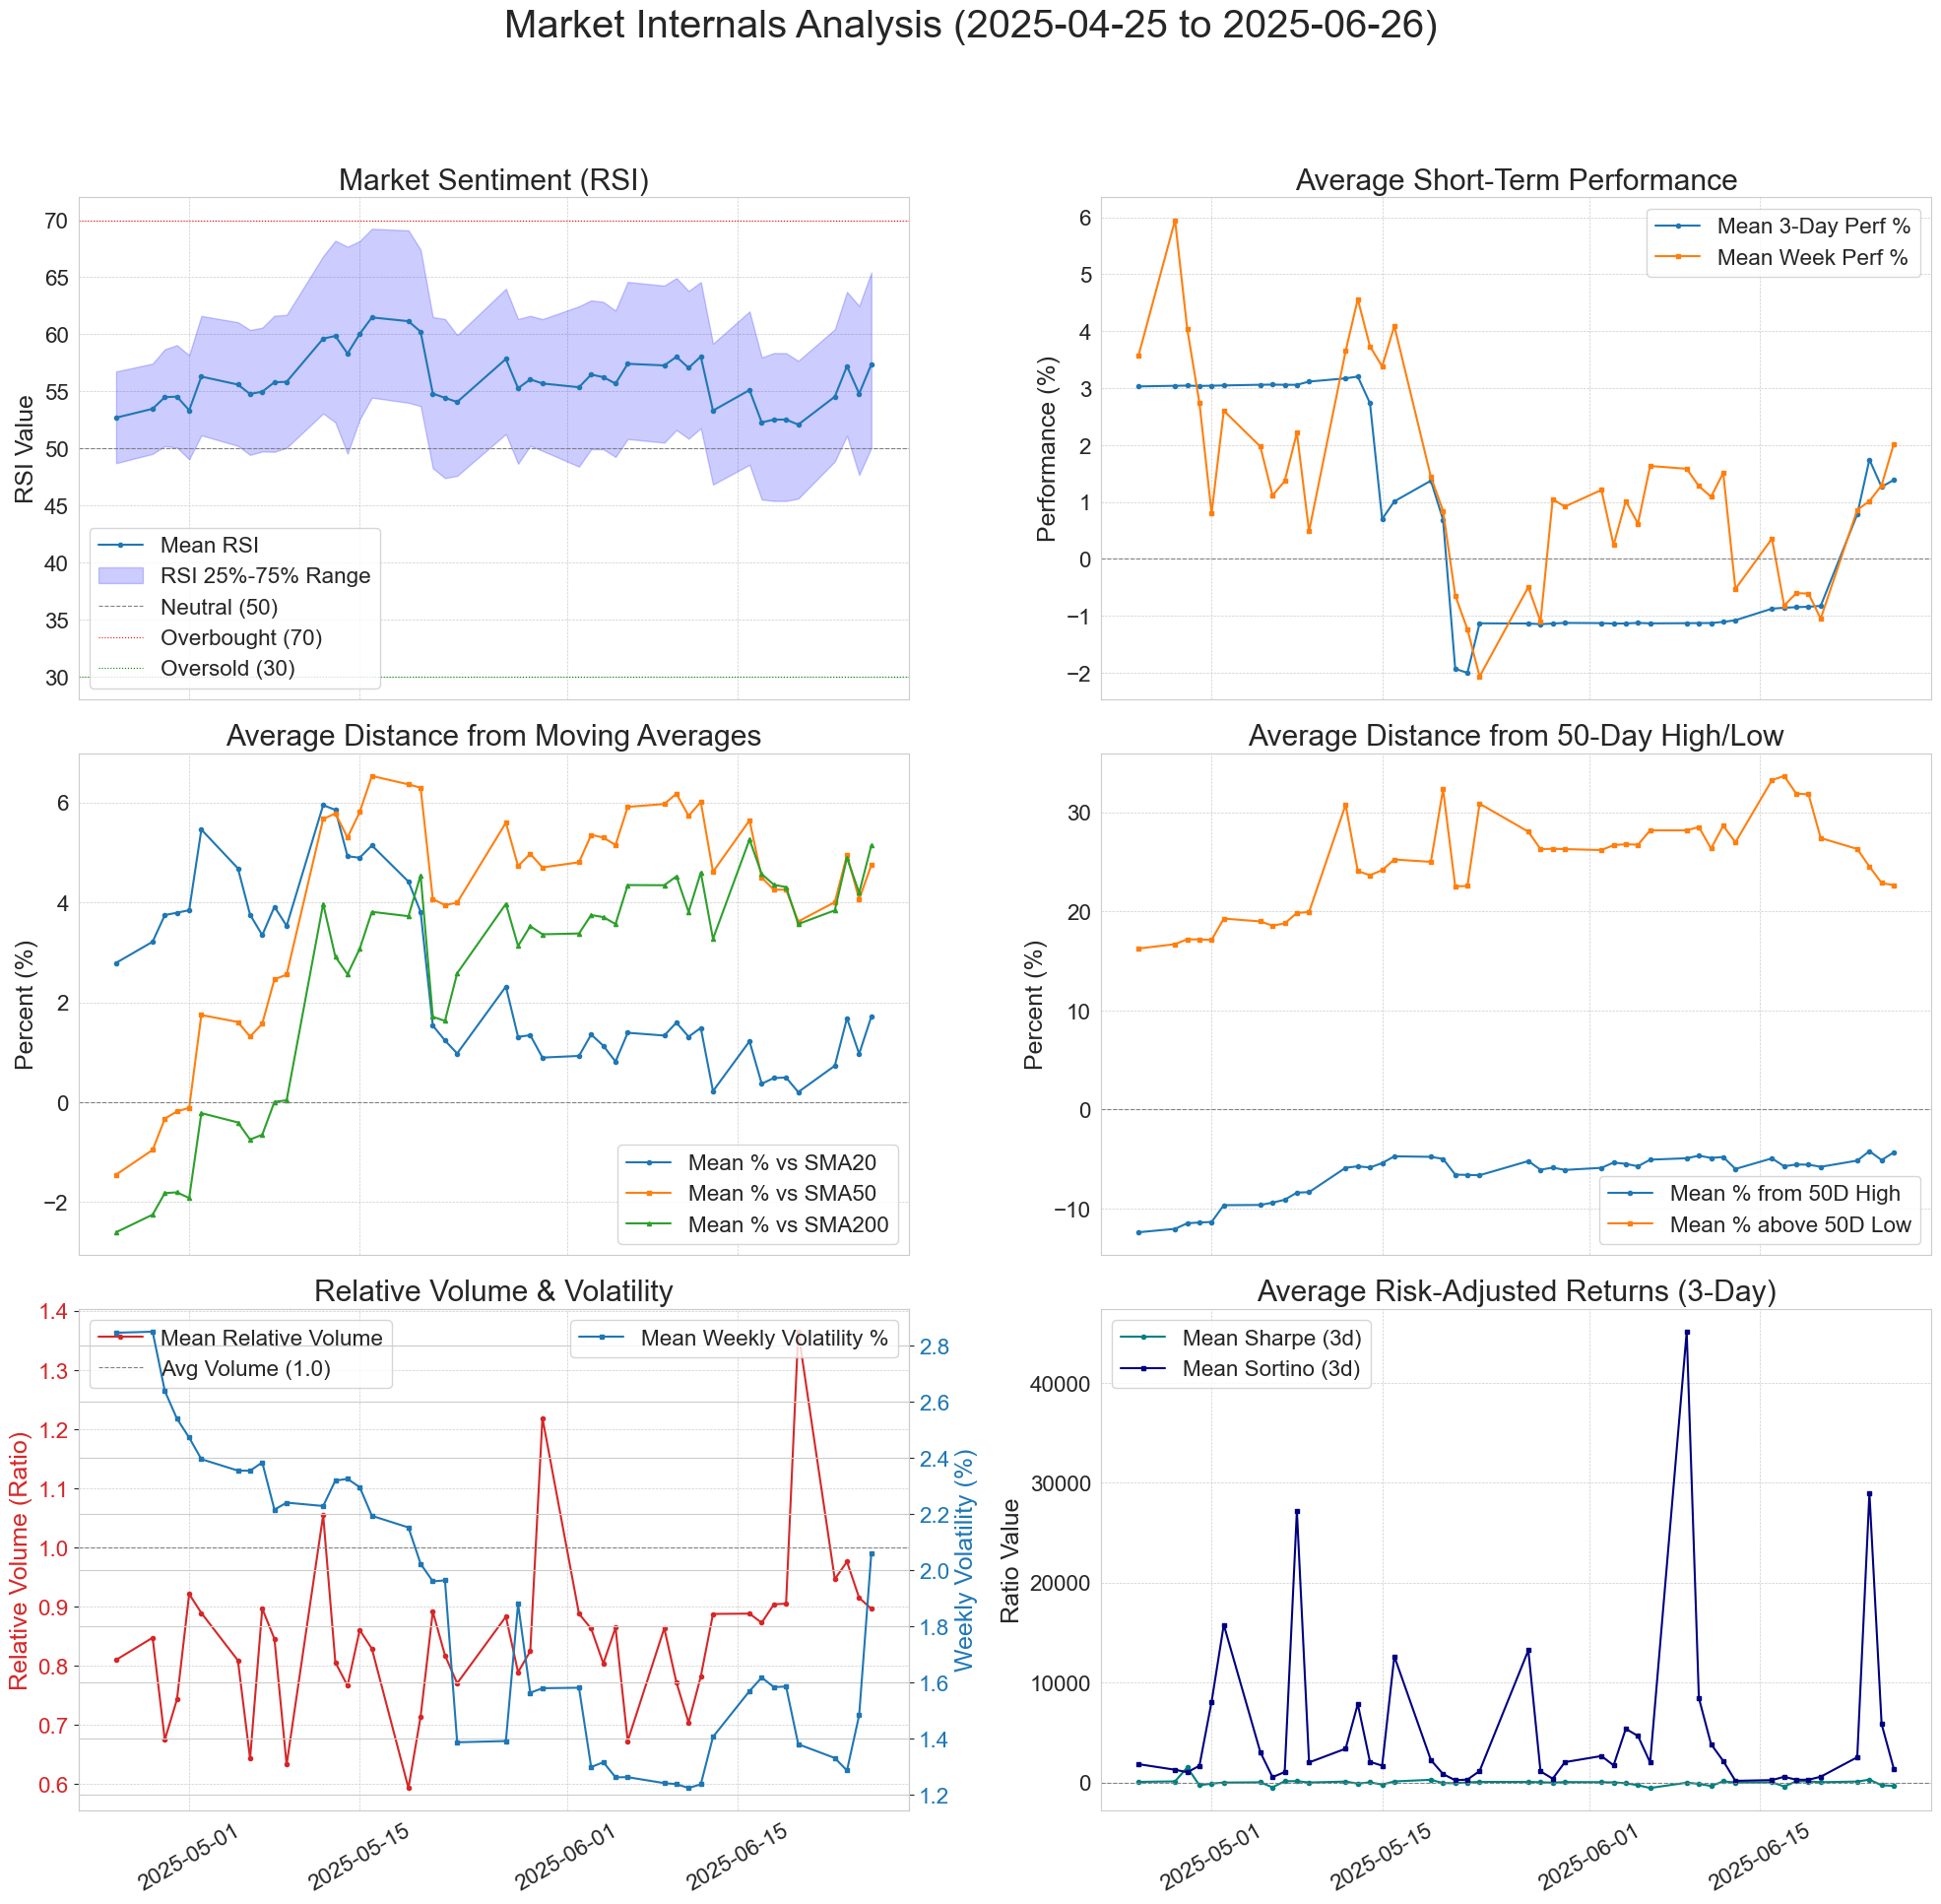

In [4]:
if df_history is not None and not df_history.empty:
    print("\n--- Step 3: Generating historical sentiment dashboard ---")
    
    # Set plot styles
    sns.set_style("whitegrid")
    plt.rcParams.update({
        'font.size': TICK_LABEL_FONTSIZE, 'axes.titlesize': SUBPLOT_TITLE_FONTSIZE,
        'axes.labelsize': AXIS_LABEL_FONTSIZE, 'xtick.labelsize': TICK_LABEL_FONTSIZE,
        'ytick.labelsize': TICK_LABEL_FONTSIZE, 'legend.fontsize': LEGEND_FONTSIZE,
        'figure.titlesize': TITLE_FONTSIZE
    })

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 19), sharex=True)
    axes = axes.flatten()

    # Call each plotting function
    plot_rsi_sentiment(axes[0], df_history)
    plot_short_term_perf(axes[1], df_history)
    plot_dist_from_sma(axes[2], df_history)
    plot_dist_from_high_low(axes[3], df_history)
    plot_volume_and_volatility(axes[4], df_history)
    plot_risk_adjusted_returns(axes[5], df_history)

    # --- Final Touches ---
    for ax in axes:
        locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
        formatter = mdates.AutoDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=30)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    actual_start_date = df_history.index.min().strftime('%Y-%m-%d')
    actual_end_date = df_history.index.max().strftime('%Y-%m-%d')
    plt.suptitle(f'Market Internals Analysis ({actual_start_date} to {actual_end_date})', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

else:
    print("\nSkipping plot generation because no data was loaded.")